In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/audio-mnist/data/audioMNIST_meta.txt
/kaggle/input/audio-mnist/data/47/6_47_0.wav
/kaggle/input/audio-mnist/data/47/5_47_30.wav
/kaggle/input/audio-mnist/data/47/0_47_45.wav
/kaggle/input/audio-mnist/data/47/4_47_17.wav
/kaggle/input/audio-mnist/data/47/4_47_33.wav
/kaggle/input/audio-mnist/data/47/3_47_45.wav
/kaggle/input/audio-mnist/data/47/6_47_27.wav
/kaggle/input/audio-mnist/data/47/0_47_13.wav
/kaggle/input/audio-mnist/data/47/2_47_6.wav
/kaggle/input/audio-mnist/data/47/8_47_12.wav
/kaggle/input/audio-mnist/data/47/5_47_4.wav
/kaggle/input/audio-mnist/data/47/6_47_4.wav
/kaggle/input/audio-mnist/data/47/5_47_6.wav
/kaggle/input/audio-mnist/data/47/3_47_38.wav
/kaggle/input/audio-mnist/data/47/3_47_27.wav
/kaggle/input/audio-mnist/data/47/7_47_12.wav
/kaggle/input/audio-mnist/data/47/0_47_40.wav
/kaggle/input/audio-mnist/data/47/0_47_42.wav
/kaggle/input/audio-mnist/data/47/1_47_10.wav
/kaggle/input/audio-mnist/data/47/6_47_19.wav
/kaggle/input/audio-mnist/data/47/

In [1]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=2a53b9b20f4c2a94b1505b02c9a33163498d8cc0530c432afa486574cae23e61
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import librosa
import scipy.io.wavfile as wav
import os
import torchaudio

In [3]:
file, rate = librosa.load('/kaggle/input/audio-mnist/data/01/1_01_13.wav')

In [4]:
file

array([ 4.23051024e-05,  1.04713035e-04,  6.21554864e-05, ...,
       -1.69336112e-04, -2.02658877e-04,  0.00000000e+00], dtype=float32)

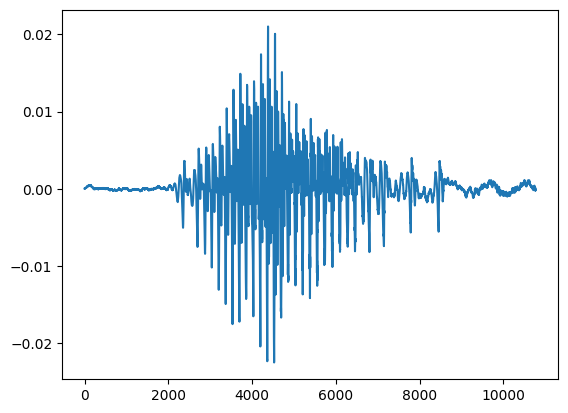

In [5]:
plt.plot(file)

In [6]:
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y, freq)

In [7]:
a,b = calc_fft(file, rate)

In [8]:
a

array([1.67649065e-06, 1.80435888e-05, 1.76688547e-05, ...,
       1.21944038e-08, 1.22028135e-08, 1.21970332e-08])

In [9]:
b[:20]

array([ 0.        ,  2.04792421,  4.09584843,  6.14377264,  8.19169685,
       10.23962106, 12.28754528, 14.33546949, 16.3833937 , 18.43131792,
       20.47924213, 22.52716634, 24.57509055, 26.62301477, 28.67093898,
       30.71886319, 32.76678741, 34.81471162, 36.86263583, 38.91056004])

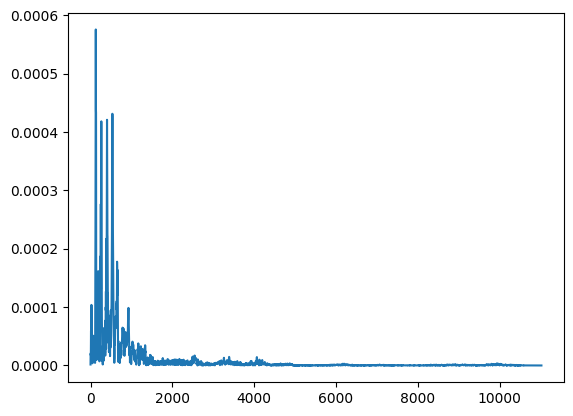

In [10]:
plt.plot(b, a)

In [15]:
bank = logfbank(a[:rate], rate, nfilt=26, nfft=10000).T
fbank = bank
mel = mfcc(a[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
mfccs = mel

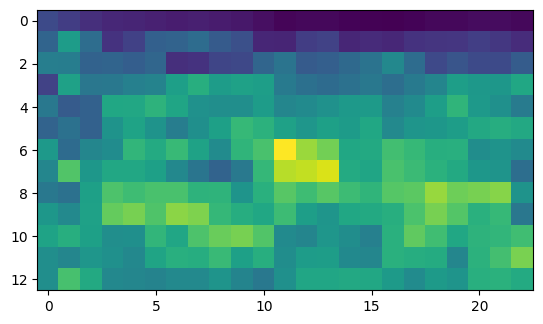

In [16]:
plt.imshow(mel)

In [5]:
ToSpectrogram = torchaudio.transforms.MelSpectrogram()
ToDB = torchaudio.transforms.AmplitudeToDB()
audio_padded = torch.zeros((1,48000))
audio = torchaudio.load('/kaggle/input/audio-mnist/data/01/3_01_13.wav')
audio_padded[0,:len(audio[0][0])] = audio[0][0]
spectrogram = ToSpectrogram(audio_padded)
spectrogram = ToDB(spectrogram)

/opt/conda/lib/python3.10/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [304]:
audio_padded.size()

torch.Size([1, 48000])

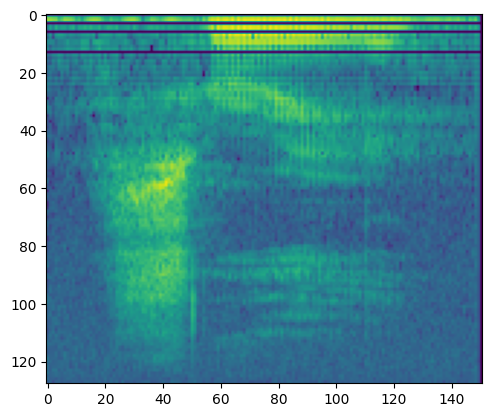

In [260]:
plt.imshow(spectrogram[0])

In [3]:
root = "/kaggle/input/audio-mnist/data"
data = []
target = []
person = []

for i in range(1, 61):
    folderPath = os.path.join(root,str(i).zfill(2))
    files = os.listdir(folderPath)
    for file in files:
        tempPerson = ''
        temp = librosa.load(folderPath + '/' + file)
        temp = temp[0]
        target += file[0]
        person.append(int(i))
        data.append(temp)

In [4]:
pd.DataFrame(target).value_counts()

0    3000
1    3000
2    3000
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64

In [5]:
class_names=sorted(pd.DataFrame(target)[0].unique().tolist())

In [6]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

paddedDataa = pad_sequences(data, padding='post', dtype='float32')

In [8]:
paddedDataa.shape

(30000, 22050)

In [9]:
target = [int(item) for item in target]

In [10]:
import torch
from torch.utils.data import Dataset
import scipy.io.wavfile as wav
import librosa
from torch.nn.functional import pad
from tensorflow.keras.preprocessing.sequence import pad_sequences


class AudioMNISTDataset(Dataset):
    def __init__(self, X, y):
        self.ToSpectrogram = torchaudio.transforms.MelSpectrogram()
        self.ToDB = torchaudio.transforms.AmplitudeToDB()
        paddedDataa = pad_sequences(X, padding='post', dtype='float32')
        self.audio = paddedDataa
        self.labels = y
        assert(len(self.audio) == len(self.labels))
    
    def __len__(self):
        return len(self.audio)
    
    def padding(self, file):
        audio_padded = torch.zeros((1,25500))
        audio_padded[0,:len(file)] = torch.Tensor(file)
        return audio_padded
    
    def mfcc_data(self, file):
#         print(file)

        spectrogram = self.ToSpectrogram(file)
        spectrogram = self.ToDB(spectrogram)
        return spectrogram[0]
    
    def __getitem__(self, idx):
        padded = self.padding(self.audio[idx])
#         print(padded.size())
        audio_seq = self.mfcc_data(padded)
#         print(audio_seq.size())

        label = self.labels[idx]
        plt.imshow(audio_seq)
        audio_seq = audio_seq.unsqueeze(0)
        return audio_seq, label

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=42)

In [13]:
from torch.utils.data import TensorDataset, DataLoader

train_loader = DataLoader(AudioMNISTDataset(X_train, y_train), batch_size=32)
test_loader = DataLoader(AudioMNISTDataset(X_test, y_test), batch_size=32)

/opt/conda/lib/python3.10/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


<class 'torch.Tensor'>
torch.Size([32, 1, 128, 128])


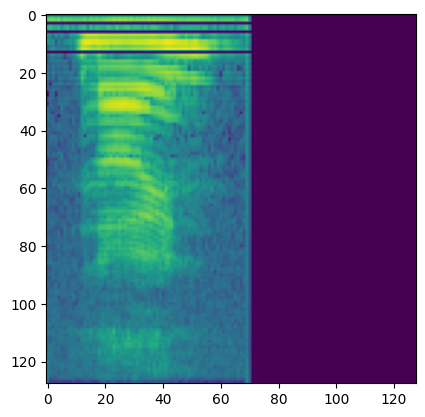

In [14]:
for images, labels in train_loader:
    print(type(images))    
    print(images.shape)
    break


In [15]:
class MyCNN(nn.Module):
    
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,padding=1)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(32,64,3,padding=1)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64*64*64,128)
        self.relu3 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(128,len(class_names))

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool(x)
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


In [16]:
model=MyCNN()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0005)

In [19]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Assuming you have defined your model, criterion, optimizer, train_loader, and test_loader

start_time = time.time()
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
epochs = 2
num = []
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()
    trn_corr = 0
    for batch_idx, (X_train, y_train) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        if batch_idx % 100 == 1:
            print(f"Training Batch {batch_idx}/{len(train_loader)} Loss: {loss.item():.6f}")
            train_accuracy.append(trn_corr.item() * 100 / (32 * batch_idx))
            num.append(batch_idx/len(train_loader))
            train_losses.append(loss.item())

#     train_loss = loss.item()
#     train_acc = trn_corr.item() * 100 / (32 * (batch_idx + 1))
#     train_losses.append(train_loss)
#     train_accuracy.append(train_acc)

    # Validation/Test phase
            model.eval()
            tst_corr = 0
            all_true = []
            all_pred = []

            with torch.no_grad():
                for batch_idx, (X_test, y_test) in enumerate(test_loader):
                    y_val = model(X_test)
                    loss = criterion(y_val, y_test)

                    predicted = torch.max(y_val.data, 1)[1]
                    batch_corr = (predicted == y_test).sum()
                    tst_corr += batch_corr

                    all_true.extend(y_test.cpu().numpy())
                    all_pred.extend(predicted.cpu().numpy())

            test_loss = loss.item()
            test_acc = tst_corr.item() * 100 / len(test_loader.dataset)
            test_losses.append(test_loss)
            test_accuracy.append(test_acc)

            # Compute and print F1 score, accuracy, precision, and recall
            f1 = f1_score(all_true, all_pred, average='weighted')
            acc = accuracy_score(all_true, all_pred)
            precision = precision_score(all_true, all_pred, average='weighted')
            recall = recall_score(all_true, all_pred, average='weighted')

            print(f"\nValidation/Test Loss: {test_loss:.6f}, Accuracy: {test_acc:.2f}%")
            print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print(f'\nTotal Duration: {time.time() - start_time:.0f} seconds')



Epoch 1/2
Training Batch 1/797 Loss: 315.876434


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation/Test Loss: 198.538940, Accuracy: 10.16%
F1 Score: 0.0187, Precision: 0.0103, Recall: 0.1016
Training Batch 101/797 Loss: 0.426756

Validation/Test Loss: 0.570378, Accuracy: 78.80%
F1 Score: 0.7772, Precision: 0.8279, Recall: 0.7880
Training Batch 201/797 Loss: 0.185980

Validation/Test Loss: 0.235356, Accuracy: 91.78%
F1 Score: 0.9187, Precision: 0.9223, Recall: 0.9178
Training Batch 301/797 Loss: 0.294577

Validation/Test Loss: 0.245506, Accuracy: 94.53%
F1 Score: 0.9454, Precision: 0.9473, Recall: 0.9453
Training Batch 401/797 Loss: 0.178633

Validation/Test Loss: 0.152195, Accuracy: 95.64%
F1 Score: 0.9567, Precision: 0.9578, Recall: 0.9564
Training Batch 501/797 Loss: 0.043696

Validation/Test Loss: 0.160065, Accuracy: 96.51%
F1 Score: 0.9652, Precision: 0.9658, Recall: 0.9651
Training Batch 601/797 Loss: 0.288028

Validation/Test Loss: 0.137874, Accuracy: 96.42%
F1 Score: 0.9641, Precision: 0.9656, Recall: 0.9642
Training Batch 701/797 Loss: 0.091834

Validation/Test L

KeyboardInterrupt: 

In [ ]:
import seaborn as sns

In [28]:
len(train_accuracy)

16

In [35]:
for i in range(8):
    num[i + 8]= num[i + 8] + 1

In [43]:
(87.37517831669044 + 98.08168316831683) / 2

92.72843074250363

In [44]:
train_accuracy[8] = 92.72843074250363

Text(0, 0.5, 'Accuracy')

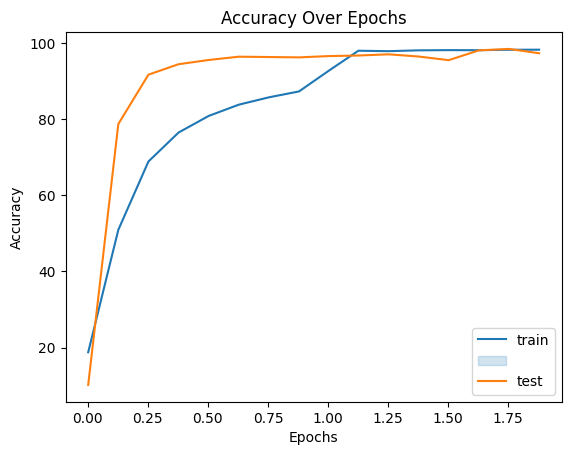

In [65]:
sns.lineplot(x=num, y = train_accuracy, data=train_accuracy)
plt.legend('train')
sns.lineplot(x=num, y = test_accuracy, data=test_accuracy)
plt.legend(['train', '', 'test'])
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


Text(0, 0.5, 'losses')

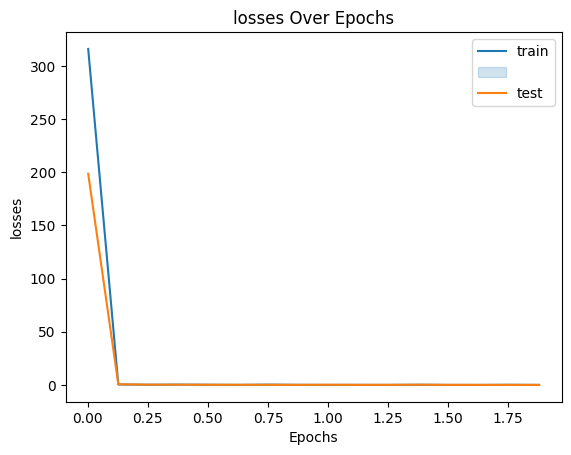

In [72]:
sns.lineplot(x=num, y = train_losses, data=train_losses)
plt.legend('train')
sns.lineplot(x=num, y = test_losses, data=test_losses)
plt.legend(['train', '', 'test'])
plt.title('losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('losses')


In [74]:
torch.save(model.state_dict(), '/kaggle/working/cnn.pkl')


In [75]:
torch.save(model.state_dict(), '/kaggle/working/cnn.pt')
